In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

In [21]:
X,y = make_classification(
    n_samples=100,
    n_features=2,
    n_informative = 1,
    n_redundant = 0,
    n_repeated = 0,
    n_classes=2,
    n_clusters_per_class = 1,
    class_sep = 10,
    hypercube = False,
    random_state=69)

In [22]:
X[0:5], y[0:5]

(array([[ 3.41355562, -0.44357374],
        [-0.90307051, -1.88006492],
        [-1.82378303, -0.14233049],
        [ 3.36343504, -0.52467429],
        [ 4.14202106, -2.46774187]]),
 array([1, 0, 0, 1, 1]))

In [23]:
len(X)

100

In [24]:
X.shape

(100, 2)

In [19]:
y.shape

(100,)

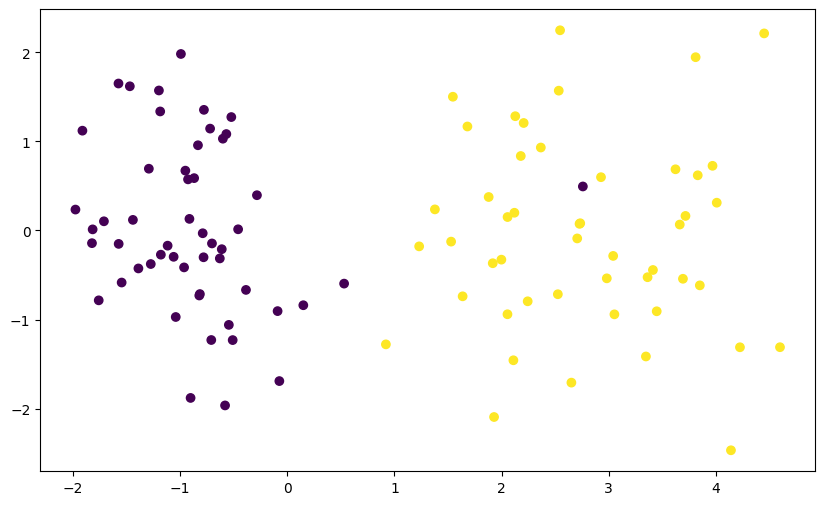

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [26]:
def step(value):
  return 1 if value>=0 else 0

In [82]:
#def perceptron(X,y):
  #X = np.insert(X,0,1,axis=1)
  #lr = 0.1
  #w = np.ones(X.shape[1])

  #for i in range(1000):
    #sample = np.random.randint(100)
    #y_hat = step(np.dot(X[sample],w))
    #w = w - lr*(y[sample]-y_hat)*X[sample]
  #return w[0],w[1:]

def perceptron(X, y, epochs=1000, lr=0.1):
    # Add bias term (1's column)
    X = np.insert(X, 0, 1, axis=1)

    # Initialize weights and bias
    weights = np.zeros(X.shape[1])  # Initialize weights as zeros (including bias)

    # Training loop
    for epoch in range(epochs):
        for i in range(len(X)):
            y_hat = step(np.dot(X[i], weights))  # Prediction
            error = y[i] - y_hat  # Calculate the error
            weights += lr * error * X[i]  # Update weights

    return weights[0], weights[1:]

In [83]:
bias, weights = perceptron(X,y)
print(f'Bias : {bias}')
print(f'Weights : {weights}')

Bias : -0.20000000000000004
Weights : [ 0.20043635 -0.06124711]


In [84]:
m = -(weights[0]/weights[1])
b = -(bias/weights[1])
#print(m,b)
print(f"Decision boundary: y = {m}x + {b}")

Decision boundary: y = 3.2725845046843314x + -3.2654601455007963


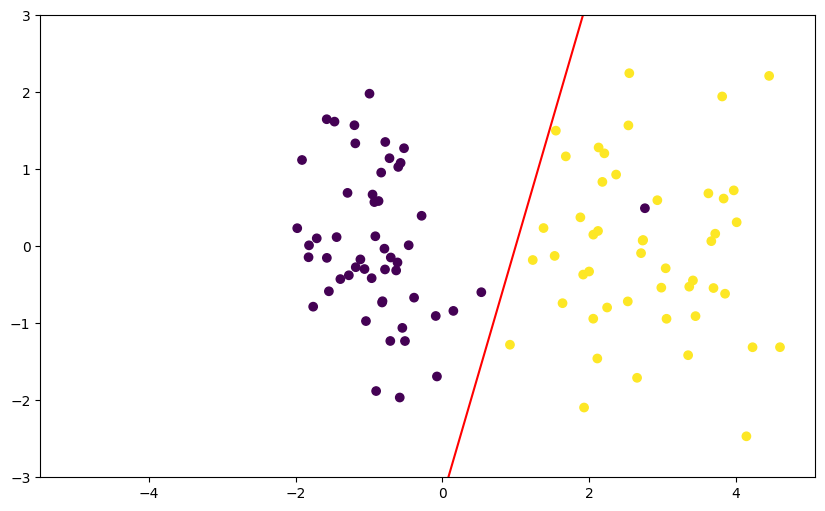

In [85]:
# y = mx+b
x_line = np.linspace(-5,3,100)
y_line = m*x_line+b

plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1], c=y)
plt.plot(x_line, y_line,color='red')
plt.ylim(-3,3)
plt.show()